In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
model = Sequential([
    Dense(units = 1200, input_shape = (1501,), activation = 'relu'),
    Dense(units = 750, activation = 'relu'),
    Dense(units = 500, activation = 'relu'),
    Dense(units = 300, activation = 'relu'),
    Dense(units = 150, activation = 'relu'),
    #Dense(units = 75, activation = 'relu'),
    Dense(units = 25, activation = 'relu'),
    Dense(units = 6),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1200)              1802400   
_________________________________________________________________
dense_1 (Dense)              (None, 750)               900750    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_5 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1

In [3]:
x = []
y = []
data_path=r'C:\Users\Rohit Varre\Desktop\Project Spidy'
categories=os.listdir(data_path)
for folder in categories:
    if folder == 'stress':
        folder_path=os.path.join(data_path,folder)
        data=os.listdir(folder_path)
        for dat in data:
            temp_path = os.path.join(folder_path,dat)
            temp = pd.read_csv(temp_path)
            temp = temp.iloc[7:]
            temp.drop('% Model', axis = 1,inplace= True)
            temp.columns = ['']
            x.append(temp.to_numpy())
    else:
        folder_path=os.path.join(data_path,folder)
        data=os.listdir(folder_path)
        for dat in data:
            temp_path = os.path.join(folder_path,dat)
            temp = pd.read_csv(temp_path)
            temp.columns = ['']
            temp = temp.drop([2],axis=0)
            y.append(temp.to_numpy())

In [4]:
x = np.array(x)
y = np.array(y)
x = x.astype(np.float)
y = y.astype(np.float)
x = x.reshape(-1,1501)
y = y.reshape(-1,6)
print(x.shape,y.shape)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

(1355, 1501) (1355, 6)


In [5]:
model.compile(optimizer=Adam(lr=0.00001), loss='mean_squared_error', metrics = ['accuracy'])
history = model.fit(x=x_train,y=y_train,epochs=50,verbose=2,validation_split=0.2,batch_size=16)

Train on 867 samples, validate on 217 samples
Epoch 1/50
867/867 - 3s - loss: 30351814439.8616 - accuracy: 0.0692 - val_loss: 274162742.5622 - val_accuracy: 0.0046
Epoch 2/50
867/867 - 2s - loss: 3837495339.5236 - accuracy: 0.0784 - val_loss: 104335978.3226 - val_accuracy: 0.1152
Epoch 3/50
867/867 - 2s - loss: 833782012.2376 - accuracy: 0.0807 - val_loss: 75758904.2581 - val_accuracy: 0.1152
Epoch 4/50
867/867 - 2s - loss: 502167775.5502 - accuracy: 0.1096 - val_loss: 35683550.2304 - val_accuracy: 0.1336
Epoch 5/50
867/867 - 2s - loss: 368019756.2907 - accuracy: 0.1073 - val_loss: 21912599.5945 - val_accuracy: 0.1382
Epoch 6/50
867/867 - 2s - loss: 342660278.0484 - accuracy: 0.1050 - val_loss: 19224315.1152 - val_accuracy: 0.1106
Epoch 7/50
867/867 - 2s - loss: 697459983.1211 - accuracy: 0.1361 - val_loss: 19178758.8848 - val_accuracy: 0.1152
Epoch 8/50
867/867 - 2s - loss: 737312376.4181 - accuracy: 0.1073 - val_loss: 19566746.8203 - val_accuracy: 0.1797
Epoch 9/50
867/867 - 2s - los

In [6]:
model.evaluate(x=x_test,y=y_test)

271/271 [==============================] - 0s 359us/sample - loss: 29025319.1626 - accuracy: 0.2583


[29025319.16264511, 0.25830257]

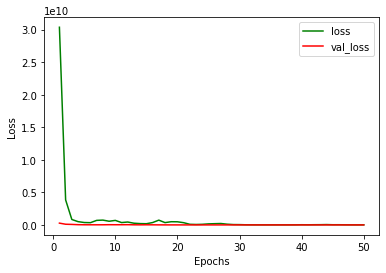

In [7]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

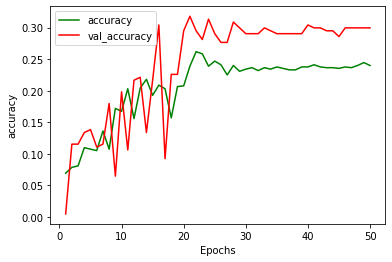

In [8]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, accuracy, 'g', label='accuracy')
plt.plot(epochs, val_accuracy, 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()